In [2]:
get_ipython().magic('matplotlib inline')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')

data=pd.read_excel('caschool.xlsx.xls')

state=440232650+470353886+470352982 # sum of the student IDs for the members of the group

train = data.sample(frac=0.8, random_state=state) # For tasks 1-5 
test = data[data.index.isin(train.index)==False].copy() # Only for prediction (task 6)

train=train.reset_index(drop=True)
test=test.reset_index(drop=True)

In [3]:
import statsmodels.formula.api as smf
reg = smf.ols(formula='testscr ~ str', data=train).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     18.39
Date:                Sun, 29 Oct 2017   Prob (F-statistic):           2.36e-05
Time:                        11:06:17   Log-Likelihood:                -1456.3
No. Observations:                 336   AIC:                             2917.
Df Residuals:                     334   BIC:                             2924.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    698.0940     10.367     67.340      0.000     677.702     718.486
str           -2.2551      0.526     -4.288      0.000      -3.289      -1.221
==============================================================================
Omnibus:                        4.611   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                3.077
Skew:                          -0.005   Prob(JB):                        0.215
Kurtosis:                       2.531   Cond. No.                         203.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The estimated relationship is: $\hat{Test Score} = 698.094 - 2.2551 S:T$ <br>
If class size were to increase by 1 student, the effect would be a decrease in test scores by 2.2551 on average. The $R^2$ is 0.052 which is pretty terrible

In [4]:
reg.params

Intercept    698.094009
str           -2.255067
dtype: float64

In [5]:
reg.mse_resid, reg.mse_resid**0.5

(342.67632237173837, 18.511518640342246)

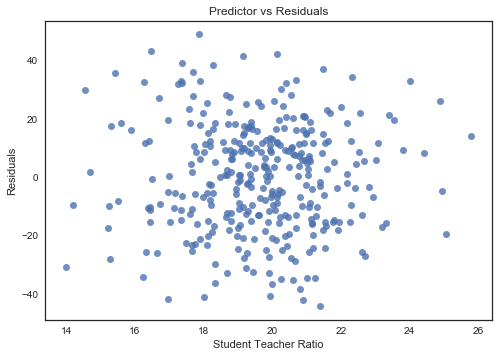

In [6]:
fig, ax= plt.subplots()
sns.regplot(train['str'], reg.resid, fit_reg=False)
ax.set_xlabel('Student Teacher Ratio')
ax.set_ylabel('Residuals')
ax.set_title('Predictor vs Residuals')
plt.show()

No clear patterns or changing variance (heteroskedasticity) - good news for assumptions 1 and 2 <br>

C:\Users\sarah\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


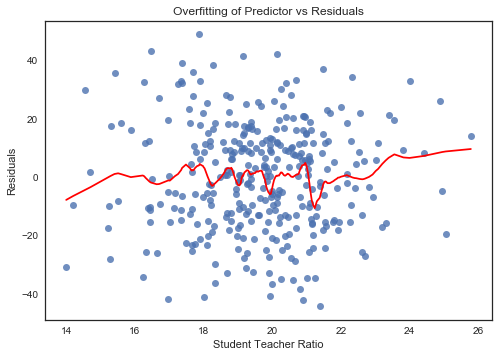

In [7]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
sns.regplot(train['str'], reg.resid, fit_reg=False)
plt.xlabel('Student Teacher Ratio')
plt.ylabel('Residuals')
plt.title('Overfitting of Predictor vs Residuals')
z1 = lowess(reg.resid, train['str'], frac=1./10)
plt.plot(z1[:,0],z1[:,1],'red')
plt.show()

In [8]:
# t-test of whether the relationship between Test Scores and Student:Teacher is significant, assuming homoskedasticity 
hypothesis = 'str = 0'
t_test = reg.t_test(hypothesis)  # 2-sided t-test
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -2.2551      0.526     -4.288      0.000      -3.289      -1.221


$H_0: \beta_1 = 0$ vs $H_0: \beta_1 \neq 0$ <br>
$\alpha = 0.05$ <br>
$t-stat = \hat{\beta_1} / SE (\hat{\beta_1}) = -4.288$ with 334 degrees of freedom. <br>
The p-value is $2P(t_{334} > 4.288) = 0.000$ therefor reject the null

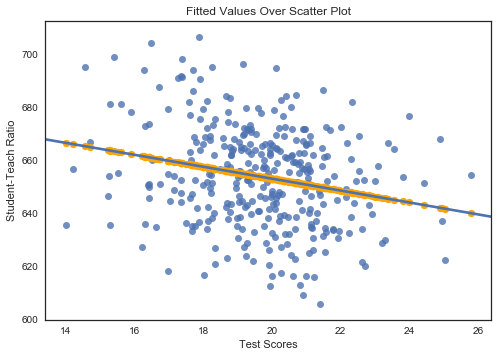

In [16]:
fit=reg.fittedvalues
sns.regplot(train['str'], train['testscr'], ci=None)
plt.scatter(train['str'], fit, c='orange')
plt.title('Fitted Values Over Scatter Plot')
plt.xlabel('Test Scores')
plt.ylabel('Student-Teach Ratio')
sns.plt.show()